# Private dataset

Follow this notebook to prepare our collected data (currently dataset is not public).

**Description:**
- This dataset is containing both RGB images and thermal images of people captured by drone platforms in different places at different height and daytime.

**labels:**
- object_category x_left y_top width_scaled height_scaled
- bounding box in annotation in xywhn (YOLO) format

**Table of content:**

0. Init - imports and data download
1. Dataset split to train, val and test
2. Dataset visualization

## 0. Init - imports and data download

Dataset directory:
```
data
└───source
    └───private-dataset
        ├───RGB
        │   ├───annotations
        │   └───images
        └───Termo
            ├───annotations
            └───images
```

In [1]:
# Uncomment below two lines to reload imported packages (in case of modifying them)
# %load_ext autoreload
# %autoreload 2

# Imports
import os
import random
import numpy as np
import shutil

from prj_utils.consts import ROOT_DIR
from data_processing.image_processing import plot_xywhn_annotated_image_from_file, get_brightness_stats, copy_annotated_images, get_number_of_objects_stats

# Consts
RGB_DIR = f'{ROOT_DIR}/data/source/private-dataset/RGB/images'
RGB_ANNO_DIR = f'{ROOT_DIR}/data/source/private-dataset/RGB/annotations'
THERM_DIR = f'{ROOT_DIR}/data/source/private-dataset/Thermal/images'
THERM_ANNO_DIR = f'{ROOT_DIR}/data/source/private-dataset/Thermal/annotations'
RGB_PROCESSED_DIR = f'{ROOT_DIR}/data/processed/private-dataset/RGB'


ANNOTATION_HEADER = ['object_category', 'x_left', 'y_top', 'width_scaled', 'height_scaled']
CLASS = '0'

## 1. Dataset split to train, val and test

In [2]:
random.seed(1)
np.random.seed(1)
filenames = os.listdir(RGB_ANNO_DIR)

split1 = int(0.6 * len(filenames))
split2 = int(0.8 * len(filenames))

np.random.shuffle(filenames)
train_filenames = filenames[:split1]
val_filenames = filenames[split1:split2]
test_filenames = filenames[split2:]

In [3]:
os.makedirs(f'{RGB_PROCESSED_DIR}/train/labels', exist_ok=True)
os.makedirs(f'{RGB_PROCESSED_DIR}/validate/labels', exist_ok=True)
os.makedirs(f'{RGB_PROCESSED_DIR}/test/labels', exist_ok=True)
os.makedirs(f'{RGB_PROCESSED_DIR}/train/images', exist_ok=True)
os.makedirs(f'{RGB_PROCESSED_DIR}/validate/images', exist_ok=True)
os.makedirs(f'{RGB_PROCESSED_DIR}/test/images', exist_ok=True)

for filename in train_filenames:
    shutil.copy(f'{RGB_ANNO_DIR}/{filename}', f'{RGB_PROCESSED_DIR}/train/labels')

for filename in val_filenames:
    shutil.copy(f'{RGB_ANNO_DIR}/{filename}', f'{RGB_PROCESSED_DIR}/validate/labels')

for filename in test_filenames:
    shutil.copy(f'{RGB_ANNO_DIR}/{filename}', f'{RGB_PROCESSED_DIR}/test/labels')

copy_annotated_images(f'{RGB_DIR}',
                      f'{RGB_PROCESSED_DIR}/train/labels',
                      f'{RGB_PROCESSED_DIR}/train/images')

copy_annotated_images(f'{RGB_DIR}',
                      f'{RGB_PROCESSED_DIR}/validate/labels',
                      f'{RGB_PROCESSED_DIR}/validate/images')

copy_annotated_images(f'{RGB_DIR}',
                      f'{RGB_PROCESSED_DIR}/test/labels',
                      f'{RGB_PROCESSED_DIR}/test/images')

print('Dataset number of images:')
print('Train size:', len(train_filenames))
print('Validate size:', len(val_filenames))
print('Test size', len(test_filenames))

Dataset number of images:
Train size: 109
Validate size: 36
Test size 37


## 2. Dataset visualization
- Dataset stats
- Data annotation visualization - example images

### 2.1 Dataset stats

Show stats by:
- number of objects in the images
- average lightness

array([[<AxesSubplot:title={'center':'number of objects'}>]], dtype=object)

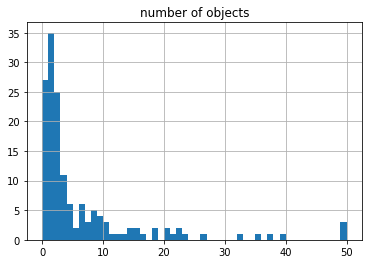

In [4]:
# By number of objects
max_people_limit = 50
number_of_people_stats = get_number_of_objects_stats(f'{RGB_PROCESSED_DIR}/train/labels')
number_of_people_stats[number_of_people_stats['number of objects'] > max_people_limit] = max_people_limit
number_of_people_stats[number_of_people_stats['number of objects'] <= max_people_limit].hist(column='number of objects', bins=max_people_limit)

array([[<AxesSubplot:title={'center':'avg brightness'}>]], dtype=object)

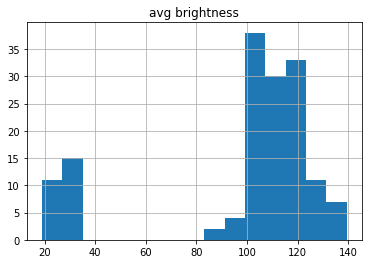

In [5]:
# By lightness
avg_lightness = get_brightness_stats(f'{RGB_PROCESSED_DIR}/train/images')
avg_lightness.hist(column='avg brightness', bins=15)

## 3.2 Example images

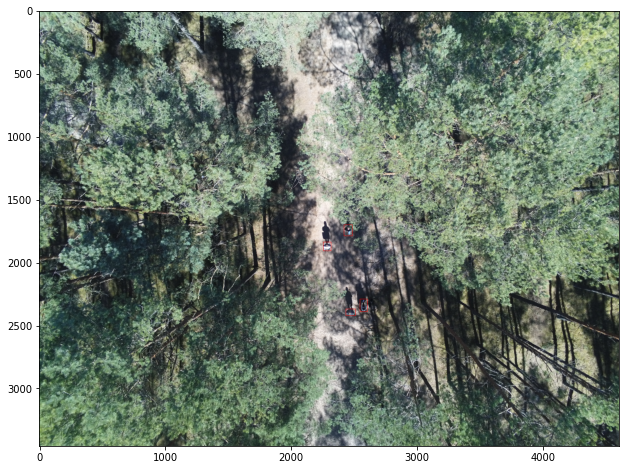

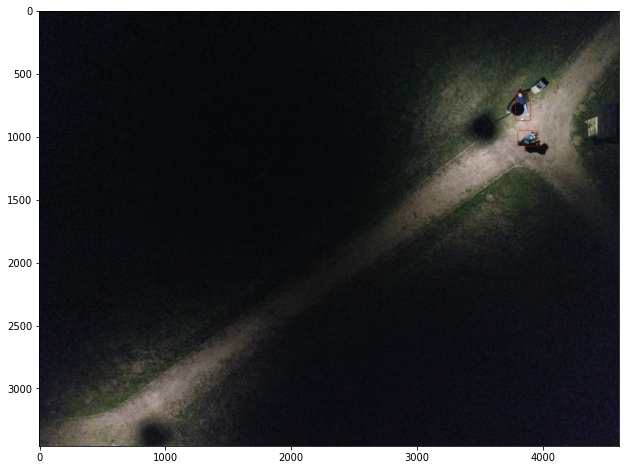

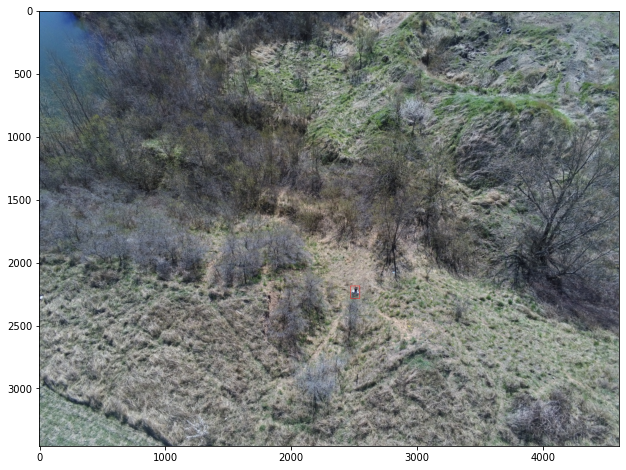

In [6]:
random.seed(3)
for filename in random.sample(os.listdir(f'{RGB_PROCESSED_DIR}/train/images'), 3):
    plot_xywhn_annotated_image_from_file(f'{RGB_PROCESSED_DIR}/train/images/{filename.split(".")[0]}.jpg',
                                         f'{RGB_PROCESSED_DIR}/train/labels/{filename.split(".")[0]}.txt')
